<a href="https://colab.research.google.com/github/SanjayS2348553/TRIMESTER-2/blob/main/2348553_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv('/content/Program_1_Dataset.csv')

In [4]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [5]:
df

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
502,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98,11.8
503,6.28807,0.0,18.10,0,0.740,6.341,96.4,2.0720,24,666,20.2,318.01,17.79,14.9
504,9.92485,0.0,18.10,0,0.740,6.251,96.6,2.1980,24,666,20.2,388.52,16.44,12.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [8]:
df.corr()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
Crime_Rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
Zone_proportion,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
Non_Retail_Acres,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
Avg_rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
Distance,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
Property_TaxRate,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

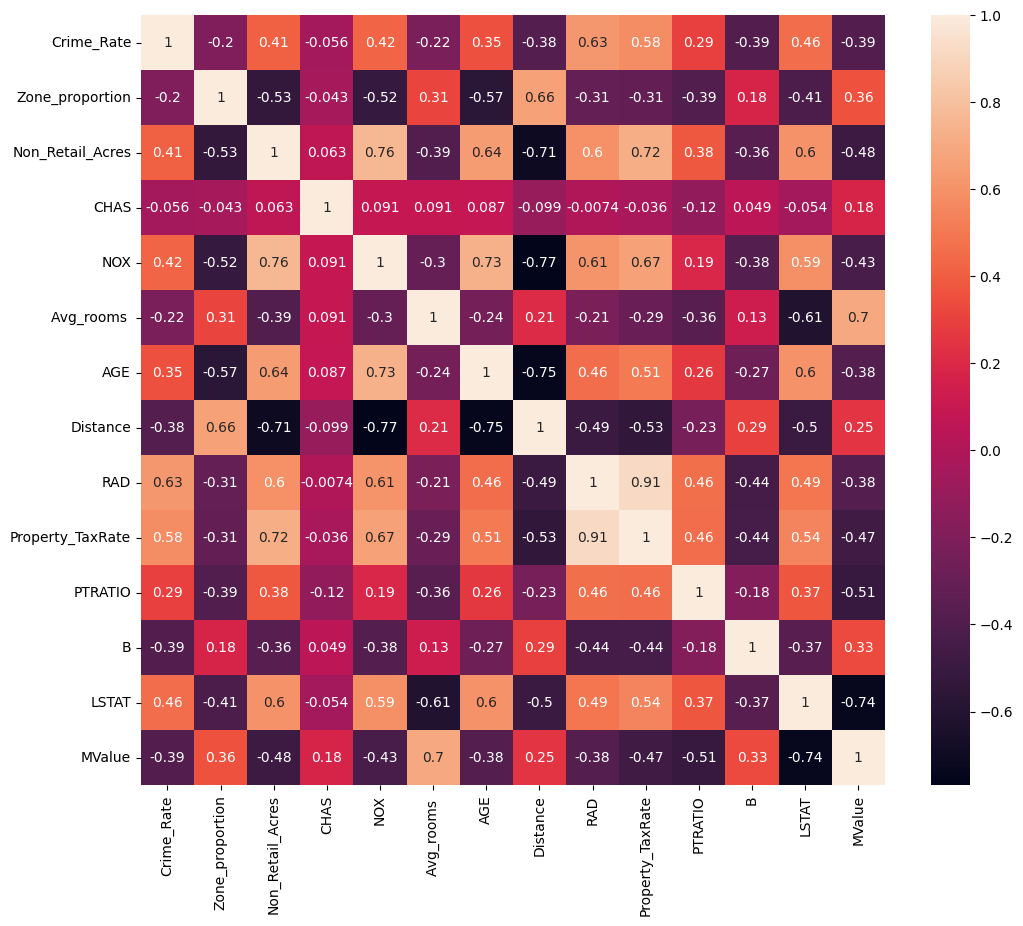

In [9]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot =True)

In [10]:
#loading the predictor and target variable values
X=df.iloc[:, 5]
y=df.iloc[:, -1]

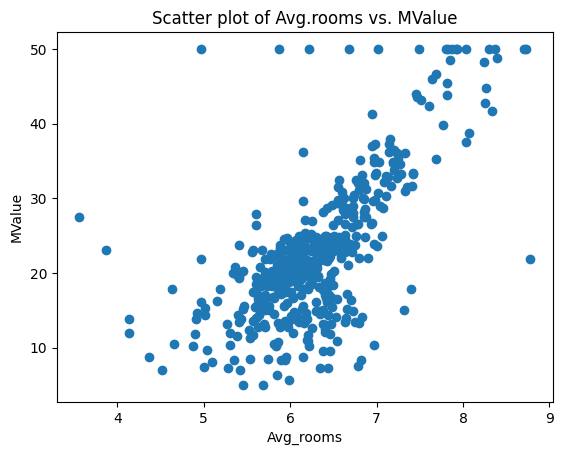

In [11]:
#scatter plot to visualize the association between the predictor and target variable
plt.scatter(X,y)
plt.title('Scatter plot of Avg.rooms vs. MValue')
plt.xlabel('Avg_rooms')
plt.ylabel('MValue')
plt.show()

In [12]:
#splitting the dataset manually
n=len(X)
split = int(0.7 * n)
X_train, X_test =X[:split], X[split:]
y_train, y_test =y[:split], y[split:]

In [13]:
import numpy as np
#calculating the mean of x and y
mean_X = np.mean(X_train)
mean_y = np.mean(y_train)

In [14]:
#calculate the slope and intercept
num = np.sum((X_train - mean_X) * (y_train - mean_y))
deno = np.sum((X_train - mean_X) ** 2)
slope = num/deno
intercept = mean_y - slope * mean_X

In [15]:
#Coefficient and Intercept values
print(f'Coefficient (slope): {slope}, Intercept: {intercept}')

Coefficient (slope): 9.017518302547185, Intercept: -33.07539575494124


In [16]:
#evaluating the model manually
#predictions on the training set
y_train_pred = slope * X_train + intercept
#predictions on the testing set
y_test_pred = slope * X_test + intercept

In [17]:
#calculating the mean square error for the training anf testing sets
mse_train = np.mean((y_train - y_train_pred) **2)
mse_test = np.mean((y_test - y_test_pred) **2)

In [18]:
#calculate R-squared
ssr = np.sum((y_test_pred - np.mean(y_test))**2)
sst=np.sum((y_test - np.mean(y_test))**2)
r2_test=ssr/sst

print(f'Training MSE: {mse_train}, Testing MSE: {mse_test}')
print(f'Testing R-squared: {r2_test}')


Training MSE: 43.326466703686364, Testing MSE: 48.01649769929029
Testing R-squared: 0.6715051059233004


Training MSE: 43.33, Testing MSE: 48.02 The training MSE is the mean squred error on the training dataset, and it measures the average squared difference between the actual and predicted values. A lower training MSE indicates better model fit to the training data.

The testing MSE is the mean squared error on the testing dataset. It provides an estimate on how well the model generalizes to new, unseen data. In this case, the testing MSE is slightly higher than the training MSE, which is expected as the model may not perform as well on unseen data.

Testing R-squared: 0.6715 This is a measure of how well the independent variable (Avg_rooms) explains the variability of the dependent variable (MValue). It ranges from 0 to 1, where 1 indicates a perfect fit.

An R-squared value of 0.6715 suggests that approximately 67.15 of the variance in the median house values can be explained by the average number of rooms per dwelling. This is a moderately good fit, but there is still room for improvement.

Inference: The model, which predicts median house values based on the average rooms, appears to have some predictive power. The +ve coefficient of Avg_rooms suggests that, on average an increase in the number of rooms is associated with an increase in median house values.

The R-squared value of 0.6715 indicates that the model captures significant portion of the variability in the target variable. However, there are other factors not considered in this model that could contribute to house values.

It's crucial to further analyze the residuals check for multicolinearity, and potentially explore more complex model to imporove predictive performance.

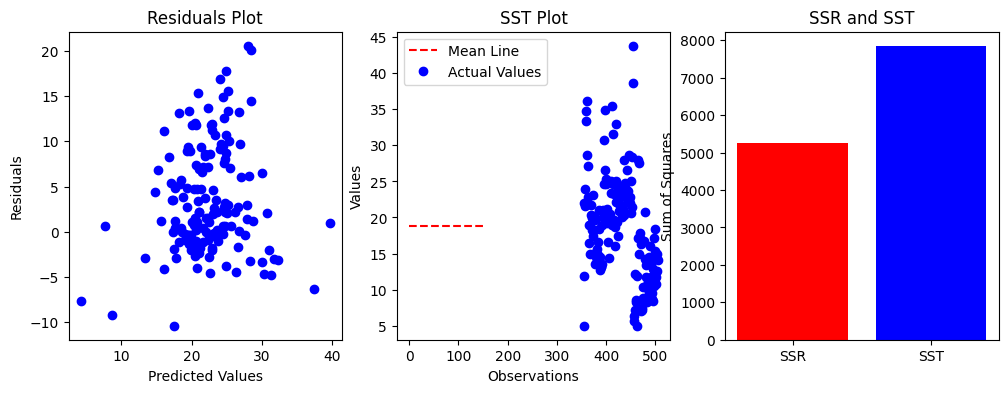

In [19]:
#Visualizing SSR, SST, and R-Squared

#SSR Plot
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.plot(y_test_pred, y_test_pred - y_test, 'bo')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

#SST plot
plt.subplot(1, 3, 2)
plt.plot([np.mean(y_test) for _ in range(len(y_test))], 'r--', label='Mean Line')
plt.plot(y_test, 'bo', label='Actual Values')
plt.title('SST Plot')
plt.xlabel('Observations')
plt.ylabel('Values')
plt.legend()


# R-squared Plot
plt.subplot(1, 3, 3)
plt.bar(['SSR', 'SST'], [ssr, sst], color=['red', 'blue'])
plt.title('SSR and SST')
plt.ylabel('Sum of Squares')
plt.show()